<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Project/Exploration_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Library

In [0]:
# Initial Library
# data analysis
import pandas as pd
import numpy as np
import random as rand

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Load Data from Kaggle
Source Data: https://www.kaggle.com/c/microsoft-malware-prediction/

!kaggle competitions download -c microsoft-malware-prediction

In [3]:
# load data from kaggle
import os
os.environ['KAGGLE_USERNAME'] = "thomastran89" # username from the json file
os.environ['KAGGLE_KEY'] = "6d1907f735446c9c560bb4371074fecd" # key from the json file
!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle
# Unzip the data
!sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip
# Check files after unzip
!ls

 99% 760M/768M [00:05<00:00, 148MB/s]
100% 768M/768M [00:05<00:00, 142MB/s]
 95% 128M/134M [00:00<00:00, 131MB/s]
100% 134M/134M [00:01<00:00, 132MB/s]
 99% 664M/672M [00:05<00:00, 122MB/s]
100% 672M/672M [00:05<00:00, 130MB/s]
/bin/bash: sample_submission.csv.zip: command not found
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
sample_data		   test.csv	 train.csv
sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [95]:
import warnings
warnings.filterwarnings('ignore')

# Load Train Data
sample_size= 200000 # data too heavy and can not load by Google Colab -> Test on 1M first rows
df_train = pd.read_csv("train.csv",skiprows=0, nrows=sample_size)
df_train.head()


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [98]:
# Load Test Data
sample_size= 200000 # data too heavy and can not load by Google Colab -> Test on 200000 first rows
df_test = pd.read_csv("test.csv",skiprows=0, nrows=sample_size)
df_test.head()


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,...,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,...,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,...,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,...,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:D

# Standard Train & Test Database

### Replace NAN value by default -1

In [0]:
df_train=df_train.fillna(-1)
df_test=df_test.fillna(-1)

### Show Train and Test Data Histogram by Platform

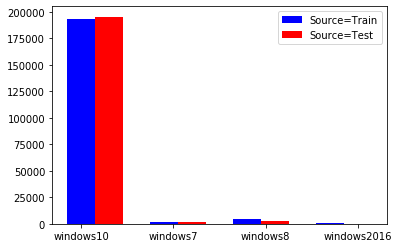

In [100]:
df_train_hist=df_train.copy()
df_train_hist["source"]="TRAIN"
df_test_hist=df_test.copy()
df_test_hist["source"]="TEST"

combine_df=pd.concat([df_train_hist,df_test_hist], axis=0, ignore_index=True)
plt.hist(combine_df.loc[combine_df['source'] == "TRAIN","Platform"], color="blue",rwidth=1,align='left',alpha=1, label="Source=Train")
plt.hist(combine_df.loc[combine_df['source'] == "TEST","Platform"],color="red",rwidth=1,align='right',alpha=1, label="Source=Test")
plt.legend()
plt.show()

# Choose Features And Build Prediction

In [0]:
#list(df_train)

In [101]:
# Get All Accept Field from dataset (Ignore the field with too much string values) to build ML model
MAX_VALUE_ACCEPT=10
listAcceptField=[]
for x in list(df_train):
    temp=df_train[x].copy()
    count=temp.nunique()
    #print("{} has unique value is:{}".format(x,count))
    if(count<MAX_VALUE_ACCEPT):
        listAcceptField.append(x)
print("Accept Fields from dataset to build Model is:")
print(listAcceptField)

Accept Fields from dataset to build Model is:
['ProductName', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'Platform', 'Processor', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode', 'Firewall', 'UacLuaenable', 'Census_DeviceFamily', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive', 'Census_PowerPlatformRoleName', 'Census_OSArchitecture', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_IsPortableOperatingSystem', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_ThresholdOptIn', 'Census_IsSecureBootEnabled', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'HasDetections']


In [102]:
# convert to dummies
df_train_features=df_train[features].copy()
df_dummies=pd.get_dummies(df_train_features)
#print test
df_dummies.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,IsProtected,AutoSampleOptIn,SMode,Firewall,UacLuaenable,Census_ProcessorManufacturerIdentifier,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections,ProductName_mse,ProductName_win8defender,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,Processor_arm64,Processor_x64,Processor_x86,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,...,Census_PrimaryDiskTypeName_-1,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_OSArchitecture_amd64,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,-1.0,0,-1.0,0.0,0,0,0.0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,-1.0,0,-1.0,0.0,0,0,0.0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,-1.0,0,-1.0,0.0,0,0,0.0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,-1.0,0,-1.0,0.0,0,0,0.0,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [103]:
from sklearn.model_selection import train_test_split
#Get the values and run a classifier 
features= listAcceptField

 # convert to dummies
X=df_dummies.drop(['HasDetections'], axis=1)
y=df_train['HasDetections']

# 70% train, 30% test from dataset train.csv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

X_train.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,IsProtected,AutoSampleOptIn,SMode,Firewall,UacLuaenable,Census_ProcessorManufacturerIdentifier,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,ProductName_mse,ProductName_win8defender,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,Processor_arm64,Processor_x64,Processor_x86,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,...,Census_PrimaryDiskTypeName_-1,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_OSArchitecture_amd64,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
129980,0,7.0,0,1.0,1.0,1,1.0,0,0.0,0.0,1.0,5.0,0,0,-1.0,0.0,-1.0,0,-1.0,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
28264,0,7.0,0,2.0,2.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,0.0,1,0.0,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
69875,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
191565,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,1.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
138165,0,7.0,0,1.0,1.0,1,1.0,0,0.0,1.0,1.0,5.0,0,0,-1.0,0.0,-1.0,1,-1.0,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# main Model
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10,scoring=make_scorer(accuracy_score))

# test with dummy
dummy_clf = DummyClassifier() # generates predictions by respecting the training set's class distribution
dummy_clf.fit(X_train,y_train)
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(accuracy_score))

#Report the results of 10-Kfold stratified cross-validation of 2 method
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.57 +/- 0.01
Dummy ACC: 0.50 +/- 0.01
